In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta
import wfdb

In [4]:
df = pd.read_csv('ptb-xl-ecg/ptbxl_database.csv')

In [5]:
tmp = wfdb.rdrecord('ptb-xl-ecg/records100/00000/00001_lr')
tmp = tmp.to_dataframe()

In [35]:
tmp.index + timedelta(milliseconds=100)

TimedeltaIndex(['0 days 00:00:00.100000', '0 days 00:00:00.110000',
                '0 days 00:00:00.120000', '0 days 00:00:00.130000',
                '0 days 00:00:00.140000', '0 days 00:00:00.150000',
                '0 days 00:00:00.160000', '0 days 00:00:00.170000',
                '0 days 00:00:00.180000', '0 days 00:00:00.190000',
                ...
                       '0 days 00:00:10', '0 days 00:00:10.010000',
                '0 days 00:00:10.020000', '0 days 00:00:10.030000',
                '0 days 00:00:10.040000', '0 days 00:00:10.050000',
                '0 days 00:00:10.060000', '0 days 00:00:10.070000',
                '0 days 00:00:10.080000', '0 days 00:00:10.090000'],
               dtype='timedelta64[ns]', length=1000, freq='10ms')

In [33]:
[timedelta(milliseconds=i*20) for i in range(5)]

[datetime.timedelta(0),
 datetime.timedelta(microseconds=20000),
 datetime.timedelta(microseconds=40000),
 datetime.timedelta(microseconds=60000),
 datetime.timedelta(microseconds=80000)]

In [43]:
x_ms + timedelta(milliseconds=100)

TypeError: Concatenation operation is not implemented for NumPy arrays, use np.concatenate() instead. Please do not rely on this error; it may not be given on all Python implementations.

In [47]:
x_ms = tmp.index / timedelta(milliseconds=1)
np.concatenate(
    [
        [i * 10 for i in range(10)], 
        x_ms + 100
    ]
)

array([0.000e+00, 1.000e+01, 2.000e+01, ..., 1.007e+04, 1.008e+04,
       1.009e+04])

In [62]:
start_pulse_ms = [0, 10, 20, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 110, 120, 130]
start_pulse_mV = np.concatenate([[0.0, 0.0], [1.0] * 12, [0.0, 0.0]])

In [61]:
len(start_pulse_mV)

14

In [54]:
def plot_ecg_line(
        ax, 
        timesteps,
        value_mV,
        lead_name,
        ms_per_mm=40,
        mV_per_mm=0.1
    ):
    
    x_ms = timesteps / timedelta(milliseconds=1)
    x_ms = np.concatenate([[i * 10 for i in range(14)], x_ms + 140])
    value_mV = np.concatenate([[0.0, 0.0], [1.0] * 10, [0.0, 0.0], value_mV])
    ax.plot(x_ms, value_mV, color='k', alpha=1, linewidth=0.8)
    ax.set_ylabel(lead_name)
    ax.set_xticks(np.arange(-100, x_ms[-1] + 200, ms_per_mm))
    ax.set_yticks(np.arange(-1.5, 1.5, mV_per_mm))
    ax.set_xticks(np.arange(-100, x_ms[-1] + 200, 5 * ms_per_mm), minor=False)
    ax.set_yticks(np.arange(-1.5, 1.5, 5 * mV_per_mm), minor=False)
    ax.minorticks_on()
    ax.grid(which='major', color='red', linestyle='-', linewidth=0.8, alpha=0.6)
    ax.grid(which='minor', color='red', linestyle='-', linewidth=0.3, alpha=0.3)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(which='both', top=False, bottom=False, left=False, right=False)
    ax.set_xlim(-200, x_ms[-1] + 200)
    ax.set_aspect(400, adjustable='box')
    return ax

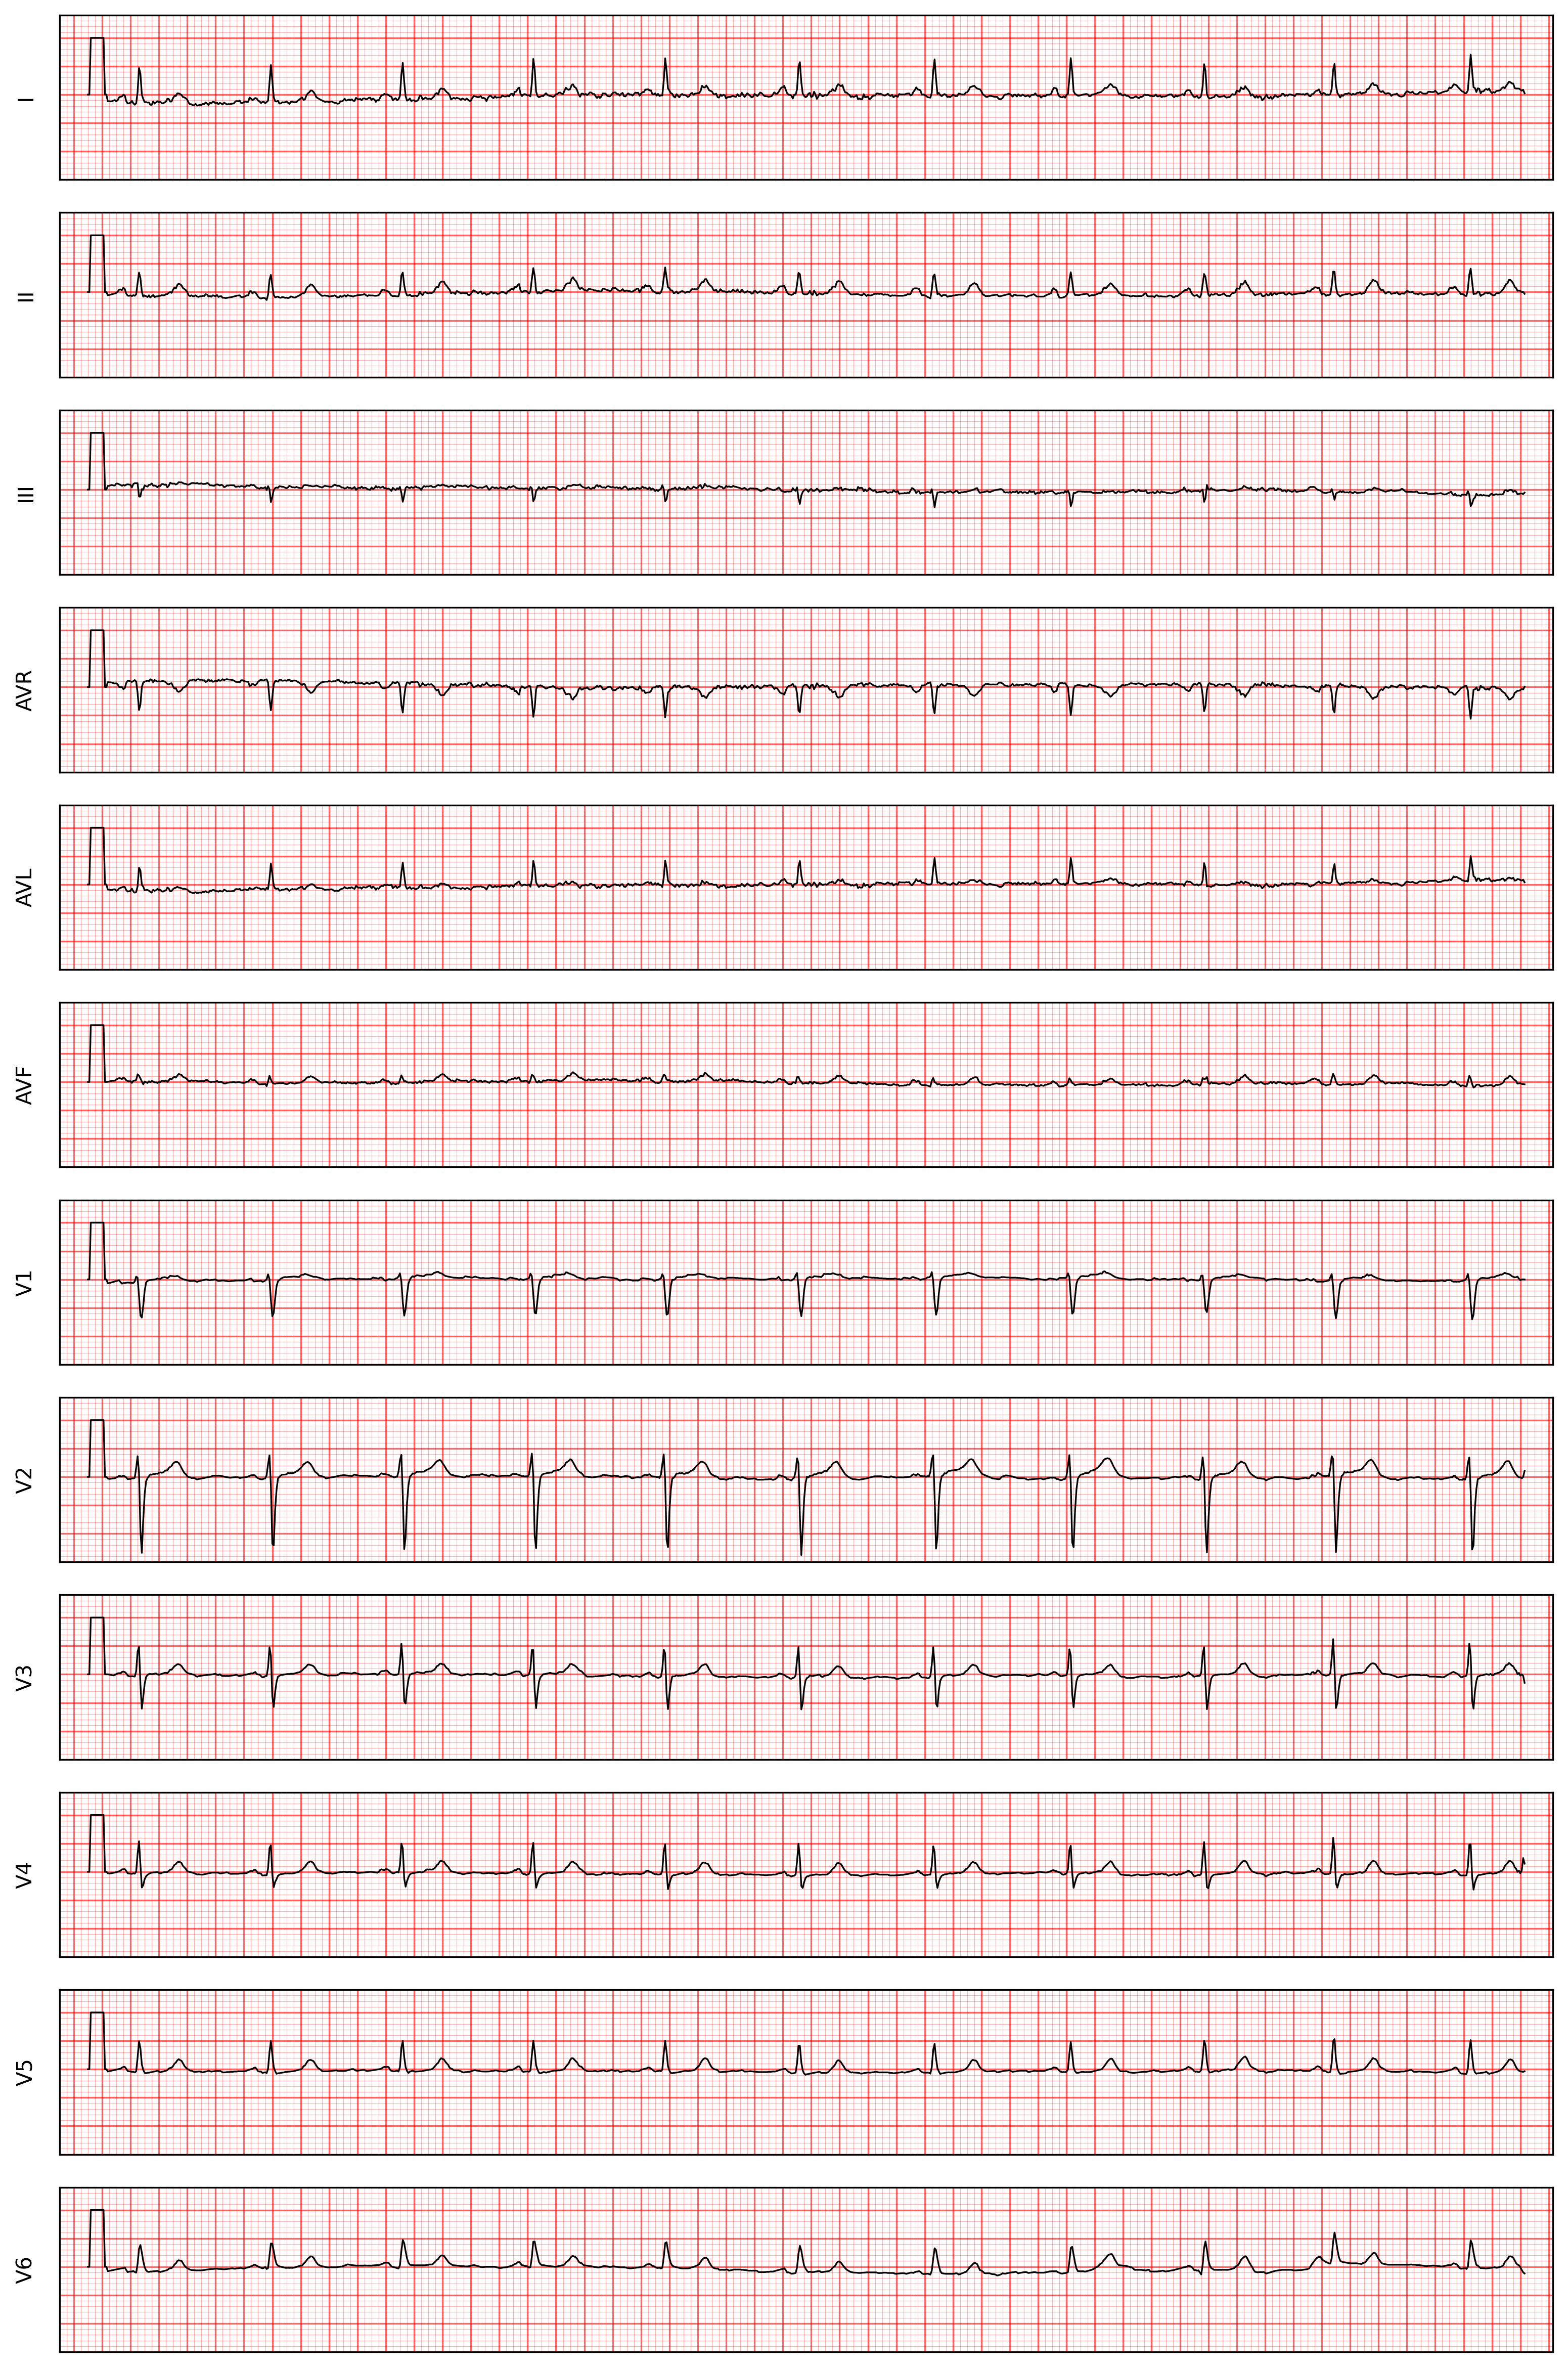

In [55]:
fig, axs = plt.subplots(12, 1, figsize=(20, 20), sharex=True, dpi=300)
# axs = np.concatenate([axs[:, 0], axs[:, 1]])
axs = axs.flatten()

for i, ax in enumerate(axs):
    lead_name = tmp.columns[i]
    x = tmp.index
    y = tmp.iloc[:, i]
    plot_ecg_line(ax, x, y, lead_name)